In [3]:
from stable_baselines3 import DQN
import pickle
import matplotlib.pyplot as plt
from gym_achtung.envs.achtungdiekurve import AchtungDieKurve
from stable_baselines3.common.evaluation import evaluate_policy

In [4]:
env = AchtungDieKurve()
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100, log_interval=4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [8]:
mean_reward, std_reward = evaluate_policy(model, model.env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:72.00 +/- 33.52


In [4]:
# Train
rewards = []
stds = []
for i in range(100):
    print("iteration: ", i+1)
    model.learn(total_timesteps=10)
    mean_reward, std_reward = evaluate_policy(model, model.env, n_eval_episodes=1)
    print(f"   mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
    
    rewards.append(mean_reward)
    stds.append(std_reward)
    
    with open("a2c_reward.txt", "wb") as f:   
        pickle.dump(rewards, f)
    with open("a2c_std.txt", "wb") as f:   
        pickle.dump(stds, f)
print("   saving...")
model.save("a2c_achtung")

iteration:  1
   mean_reward:395.00 +/- 0.00
iteration:  2
   mean_reward:160.00 +/- 0.00
iteration:  3
   mean_reward:165.00 +/- 0.00
iteration:  4
   mean_reward:180.00 +/- 0.00
iteration:  5
   mean_reward:180.00 +/- 0.00
iteration:  6
   mean_reward:170.00 +/- 0.00
iteration:  7
   mean_reward:175.00 +/- 0.00
iteration:  8
   mean_reward:170.00 +/- 0.00
iteration:  9
   mean_reward:180.00 +/- 0.00
iteration:  10
   mean_reward:215.00 +/- 0.00
iteration:  11
   mean_reward:170.00 +/- 0.00
iteration:  12
   mean_reward:170.00 +/- 0.00
iteration:  13
   mean_reward:170.00 +/- 0.00
iteration:  14
   mean_reward:170.00 +/- 0.00
iteration:  15
   mean_reward:165.00 +/- 0.00
iteration:  16
   mean_reward:170.00 +/- 0.00
iteration:  17
   mean_reward:215.00 +/- 0.00
iteration:  18
   mean_reward:200.00 +/- 0.00
iteration:  19
   mean_reward:165.00 +/- 0.00
iteration:  20
   mean_reward:175.00 +/- 0.00
iteration:  21
   mean_reward:540.00 +/- 0.00
iteration:  22
   mean_reward:170.00 +/- 0.

In [5]:
# Evaluate the trained policy
model.load("a2c_achtung")
mean_reward, std_reward = evaluate_policy(model, model.env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:309.00 +/- 125.54


Text(0.5, 1.0, 'advantage actor critic')

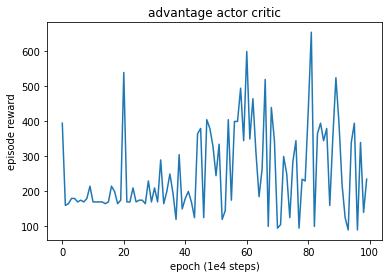

In [6]:
plt.plot(rewards)
plt.xlabel('epoch (1e4 steps)')
plt.ylabel('episode reward')
plt.title('advantage actor critic')

Text(0.5, 1.0, 'advantage actor critic')

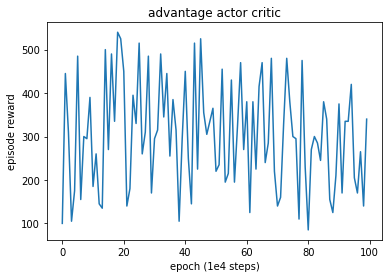

In [22]:
plt.plot(rewards)
plt.xlabel('epoch (1e4 steps)')
plt.ylabel('episode reward')
plt.title('advantage actor critic')